In [109]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [110]:
tickers = ['SSL']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1',)['Close']

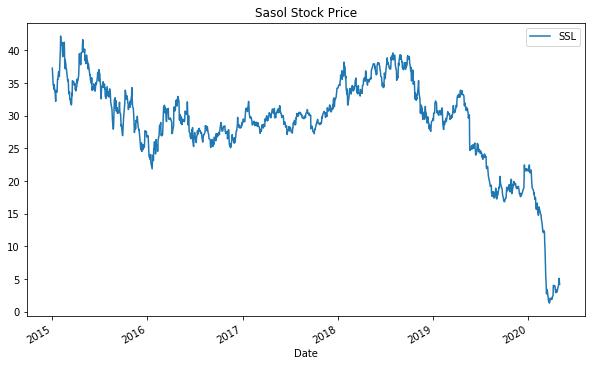

In [111]:
data.plot(figsize=(10, 6))
plt.title("Sasol Stock Price")
plt.show()

## Log Returns

In [112]:
log_returns = np.log(1 + data.pct_change())

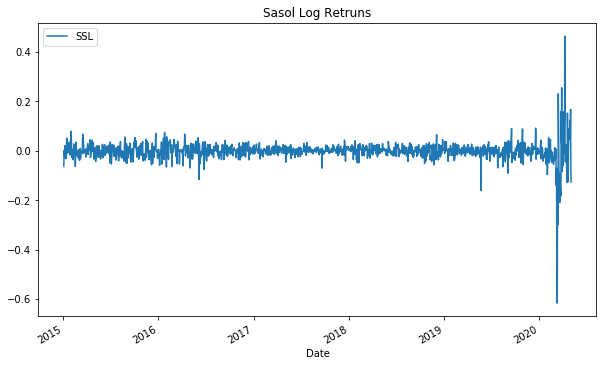

In [113]:
log_returns.plot(figsize = (10, 6))
plt.title("Sasol Log Retruns")
plt.show()

## Compute Drift

In [114]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
drift

SSL   -0.002359
dtype: float64

In [115]:
norm.ppf(0.95)

1.6448536269514722

In [116]:
x = np.random.rand(10, 2)
x

array([[0.63152489, 0.15429625],
       [0.10125326, 0.81611782],
       [0.12019407, 0.86027785],
       [0.027104  , 0.81942564],
       [0.17045396, 0.05017238],
       [0.33787303, 0.43502956],
       [0.45603201, 0.20745829],
       [0.99696498, 0.60735095],
       [0.9582567 , 0.87001853],
       [0.56423328, 0.23673458]])

In [117]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.71999549, -0.87530014],
       [-2.06725603, -0.17163976],
       [-1.61783516,  1.42889907],
       [ 0.74724113,  0.99012131],
       [-0.69415083,  0.54149253],
       [ 0.61949651, -0.10507945],
       [-0.8972662 , -0.91262193],
       [-0.27546842,  0.60632602],
       [ 0.40654899,  0.82903616],
       [-1.79368447, -1.22820262]])

In [118]:
t_intervals = 100
iterations = 1000
stdev = log_returns.std()
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [119]:
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

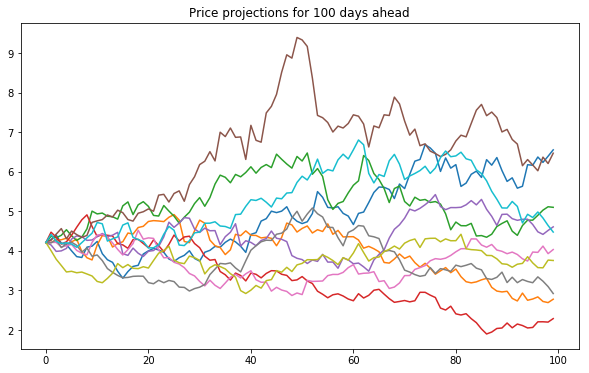

In [120]:
plt.figure(figsize=(10,6))
plt.title("Price projections for 100 days ahead")
plt.plot(price_list[:, :10]);

## Average Price Prediction

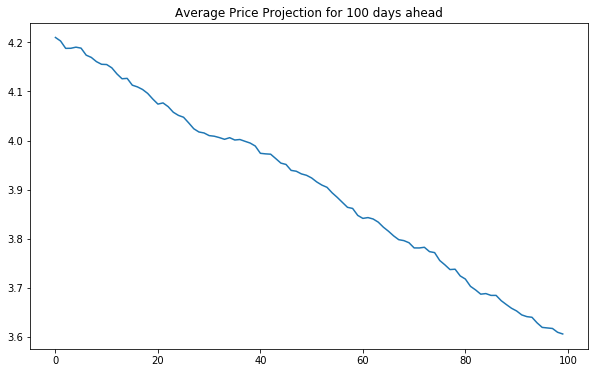

In [121]:
average =[i.mean() for i in price_list]
plt.figure(figsize=(10,6))
plt.title("Average Price Projection for 100 days ahead")
plt.plot(average);

In [122]:
print("Projected Return: %.2f%%"%((average[-1]-average[0])/average[0]*100))

Projected Return: -14.35%
